# Module 3 — Quantum Algorithms Basics

## 3.1 Quantum Superposition & Parallelism
- Superposition allows qubits to encode multiple states simultaneously.
- This enables "quantum parallelism" — evaluating functions on many inputs at once.

## 3.2 Interference in Quantum Circuits
- Quantum algorithms use constructive and destructive interference.
- Example: applying H gates can amplify or cancel amplitudes.

## 3.3 The Deutsch Algorithm
- Problem: Decide if a function f:{0,1}→{0,1} is constant or balanced.
- Quantum solution needs only **1 evaluation** vs classical needing **2**.
- Uses: H gates, oracle Uf, measurement.

## 3.4 The Bernstein-Vazirani Algorithm
- Problem: Find hidden bit string `s` given f(x)=s·x (dot product mod 2).
- Classical: O(n) evaluations.  
- Quantum: **1 evaluation**.
- Uses H gates, Uf oracle, and measurement.

## 3.5 Hands-On: Implementing Deutsch & BV in Qiskit
- Build circuits step by step.
- Simulate measurement outcomes and compare with classical.


In [1]:
# Superposition 
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h([0,1])
state = Statevector.from_instruction(qc)
display(state.draw('latex'))

<IPython.core.display.Latex object>

In [2]:
# Interference Example
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0) # Applying H twice = Identity (Interference cancels)
state = Statevector.from_instruction(qc)
display(state.draw('latex'))


<IPython.core.display.Latex object>

# Deutsch Algorithm

## Define oracle for balanced/constant functions.

## Apply Hadamards → Uf → Hadamards → measure.

{'1': 2000}


d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


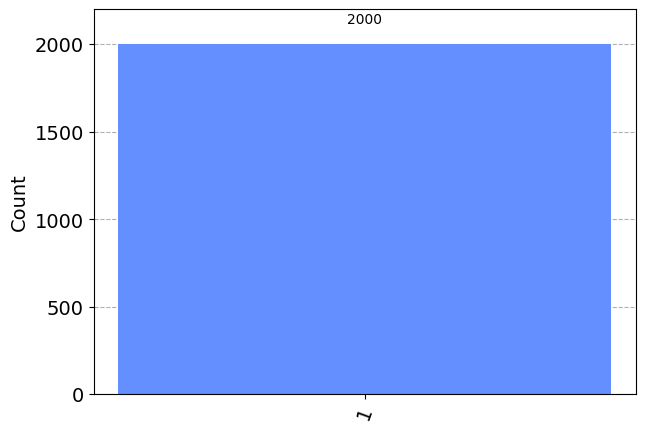

In [2]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Deutsch Algorithm for f(x) = x (balanced)
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h([0,1])
qc.barrier()

qc.cx(0,1)
qc.barrier()

qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')

sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 2000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

{'101': 2000}


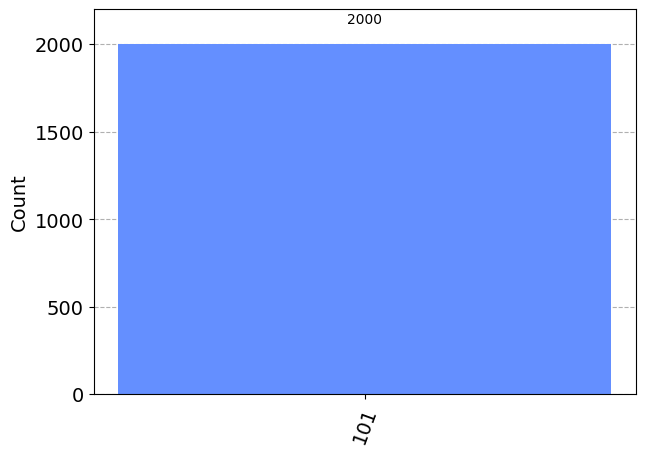

In [7]:
# Bernstein-Vazirani Algorithm (Example : secret string s = "101")

n = 3
qc = QuantumCircuit(n+1, n)
qc.x(n)
qc.h(range(n+1))

#Oracle for s = 101
qc.cx(0,n)
qc.cx(2,n)

qc.h(range(n))
qc.measure(range(n), range(n))
qc.draw('mpl')
sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 2000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Bell states & their measurement correlations
## Bell states are maximally entangled 2-qubit states. Example:
## ket [phi(+)]​ = ket(00) + ket(11) / root2
## They show strong correlation in multiple measurement bases (Z,X)

## code - Prepare ket[phi(+)], view statevector, measure in Z

.

d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


<IPython.core.display.Latex object>

{'11': 1984, '00': 2016}


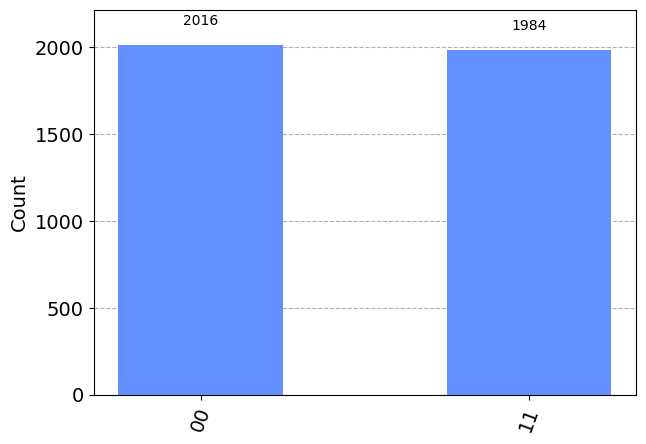

In [22]:
# |Φ+> = (|00> + |11>)/√2
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')

#Statevector (use circuit without measurement)
qc_sv = QuantumCircuit(2)
qc_sv.h(0)
qc_sv.cx(0, 1)
sv = Statevector.from_instruction(qc_sv)
display(sv.draw('latex'))

# Z-basis measurement correlations (~50% 00 and 50% 11)
qc_meas = qc.copy()
qc_meas.measure([0, 1], [0, 1])
tqc = transpile(qc_meas, sim)
res = sim.run(tqc, shots = 4000).result()
counts = res.get_counts()
print(counts)
plot_histogram(counts)

{'00': 1994, '11': 2006}


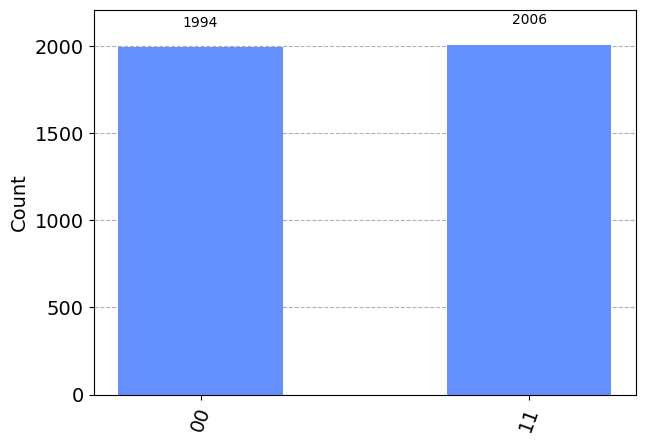

In [23]:
# Measure both qubits in X basis: apply H, then measure
qc_x = QuantumCircuit(2, 2)
qc_x.h(0); qc_x.cx(0,1)
qc_x.h([0,1])               # rotate X->Z
qc_x.measure([0,1],[0,1])

tqc_x = transpile(qc_x, sim)
res_x = sim.run(tqc_x, shots=4000).result()
counts_x = res_x.get_counts()
print(counts_x)
plot_histogram(counts_x)


In [29]:
def corr_E(counts):
    shots = sum(counts.values())
    p = {b: counts.get(b,0)/shots for b in ['00','01','10','11']}
    return p['00'] + p['11'] - p['01'] - p['10']

print("E_ZZ =", corr_E(counts))
print("E_XX =", corr_E(counts_x))


E_ZZ = 1.0
E_XX = 1.0


# GHZ state creation
## Shows all-or-nothing correlations.

{'000': 2005, '111': 1995}


d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


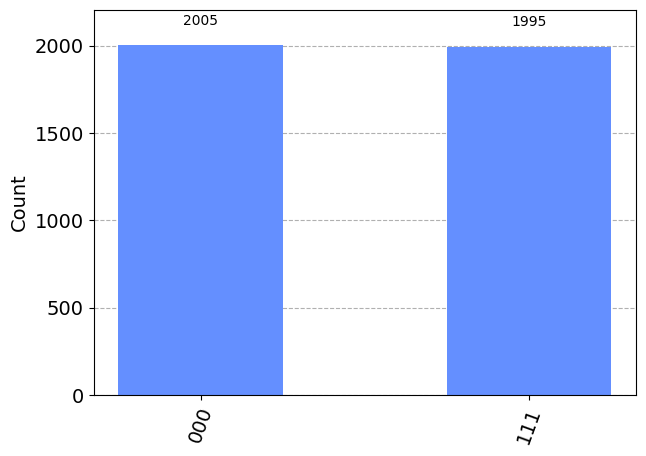

In [32]:
# Build and measure GHZ

qc = QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure([0,1,2],[0,1,2])
qc.draw('mpl')

tqc = transpile(qc,sim)
res = sim.run(tqc, shots = 4000).result()
counts = res.get_counts()
print(counts)
plot_histogram(counts)  

# Quantum teleportation protocol (step-by-step) (Markdown)

## Goal: transfer an unknown state ∣𝜓⟩ from Alice (q0) to Bob (q2) using shared entanglement (q1–q2) and 2 classical bits.
## Steps: prepare ∣𝜓⟩ on q0 → create Bell pair between q1 & q2 → Bell-measure q0,q1 → send bits → Bob applies conditional 𝑍 and 𝑋.

Input state: theta=0.6, phi=0.3


d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


"Output measurement (Bob's qubit):"

Input state: theta=0.6, phi=0.3


d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


"Output measurement (Bob's qubit):"

{'1 0 0': 23,
 '0 0 1': 246,
 '0 1 0': 205,
 '0 0 0': 231,
 '0 1 1': 239,
 '1 1 1': 14,
 '1 0 1': 21,
 '1 1 0': 21}

Input state: theta=0.6, phi=0.3


d:\QUANTUM COMPUTING\Industry Projects\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


"Output measurement (Bob's qubit):"

{'1 0 0': 23,
 '0 0 1': 246,
 '0 1 0': 205,
 '0 0 0': 231,
 '0 1 1': 239,
 '1 1 1': 14,
 '1 0 1': 21,
 '1 1 0': 21}

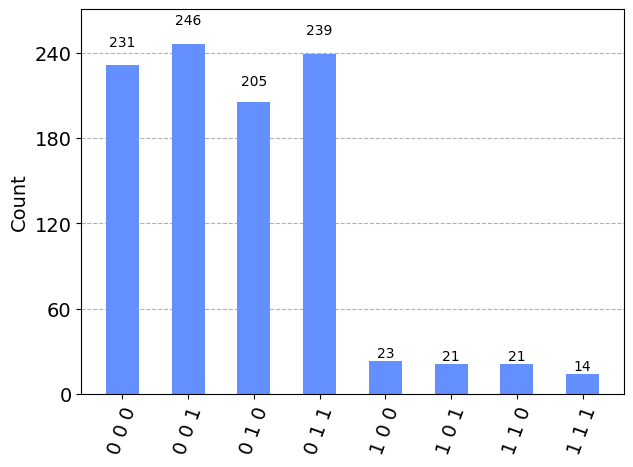

In [1]:
# Teleportation with conditional corrections
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit import transpile

qr = QuantumRegister(3)
crz = ClassicalRegister(1, 'cz')
crx = ClassicalRegister(1, 'cx')
crout = ClassicalRegister(1, 'cout') # for Bob's output measurement
qc = QuantumCircuit(qr, crz, crx, crout)

# 1. Prepare an arbitrary state psi on q0 
theta, phi = 0.6, 0.3
qc.ry(theta, qr[0])
qc.rz(phi, qr[0])

# 2. Create Bell pair between q1 and q2
qc.h(qr[1])
qc.cx(qr[1], qr[2])
qc.barrier()

# 3. Bell measurement on q0 and q1
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.measure(qr[0], crz[0]) # first bit controls Z
qc.measure(qr[1], crx[0]) # second bit controls X

# 4. Bob's conditional corrections on q2
qc.z(qr[2]).c_if(crz, 1) # if crz==1 apply Z
qc.x(qr[2]).c_if(crx, 1) # if crx==1 apply X

# 5. Measure Bob's qubit to classical output register
qc.measure(qr[2], crout[0])

qc.draw('mpl')

# Simulate and show output
sim = AerSimulator()
tqc = transpile(qc, sim)
result = sim.run(tqc, shots=1000).result()
counts = result.get_counts()
print(f"Input state: theta={theta}, phi={phi}")
display("Output measurement (Bob's qubit):", counts)
plot_histogram(counts)

In [12]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace, DensityMatrix
import numpy as np

# -----------------------------
# 1) Prepare arbitrary state |ψ> on q0
# -----------------------------
theta, phi = 0.6, 0.3   # change angles to test
qc_prep = QuantumCircuit(1)
qc_prep.ry(theta, 0)
qc_prep.rz(phi, 0)

# Save Alice’s prepared state (as single-qubit density matrix)
psi = Statevector.from_instruction(qc_prep)
psi_dm = DensityMatrix(psi)

# -----------------------------
# 2) Full teleportation circuit
# -----------------------------
qc = QuantumCircuit(3)

# prepare |ψ> on q0
qc.ry(theta, 0)
qc.rz(phi, 0)

# entanglement between q1-q2
qc.h(1)
qc.cx(1, 2)

# Bell measurement (no classical measurement here)
qc.cx(0, 1)
qc.h(0)

# Bob’s corrections (unitary form)
qc.cx(1, 2)   # X correction
qc.cz(0, 2)   # Z correction

# -----------------------------
# 3) Get final statevector
# -----------------------------
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
final_state = result.get_statevector(qc)

# -----------------------------
# 4) Extract Bob’s qubit only
# -----------------------------
bob_state = partial_trace(final_state, [0,1])  # reduced density matrix of q2

# -----------------------------
# 5) Fidelity check
# -----------------------------
fidelity = state_fidelity(psi_dm, bob_state)

print("Alice’s original state |ψ⟩ =", psi_dm)
print("Bob’s final state =", bob_state)
print("Fidelity =", fidelity)


Alice’s original state |ψ⟩ = DensityMatrix([[0.91266781+0.j        , 0.26971178-0.08343163j],
               [0.26971178+0.08343163j, 0.08733219+0.j        ]],
              dims=(2,))
Bob’s final state = DensityMatrix([[0.91266781+0.j        , 0.26971178-0.08343163j],
               [0.26971178+0.08343163j, 0.08733219+0.j        ]],
              dims=(2,))
Fidelity = 1.0000000000000004


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28544\1308919885.py:42: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(qc, backend).result()


# Superdense coding

- Use shared entanglement to send 2 classical bits by transmitting 1 qubit.
- Encoding map (on Alice’s qubit):# 00 → 𝐼
- 01 → 𝑋
- 10 → 𝑍
- 11 → 𝑋𝑍 (or 𝑍 then 𝑋)
- Bob decodes with CNOT + H and measures two bits.

# Hands-on experiments with simulation

In [14]:
# Helper: measure in arbitrary basis
from qiskit import QuantumCircuit

def measure_in_basis(qc, qubits, clbits, basis='Z'):
    """
    Apply basis rotations before measuring.
    basis: 'Z', 'X', 'Y'
    """
    for q in qubits:
        if basis == 'X':
            qc.h(q)
        elif basis == 'Y':
            qc.sdg(q)
            qc.h(q)
    qc.measure(qubits, clbits)
    return qc


In [ ]:
# Bell basis sweep
# Prepare all 4 Bell states and check Z and X correlations.
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
def bell_state(which="phi+"):
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    if which == "phi-":
        qc.z(0)
    elif which == "psi+":
        qc.x(0)
    elif which == "psi-":
        qc.z(0); qc.x(0)
    return qc

states = ["phi+","phi-","psi+","psi-"]
sim = AerSimulator()
for s in states:
    qc = bell_state(s).copy()
    qc_z = qc.copy()
    qc_z = measure_in_basis(qc_z, [0,1],[0,1],'Z')
    res_z = sim.run(transpile(qc_z, sim), shots=2000).result().get_counts()
    
    qc_x = bell_state(s).copy()
    qc_x = measure_in_basis(qc_x, [0,1],[0,1],'X')
    res_x = sim.run(transpile(qc_x, sim), shots=2000).result().get_counts()
    
    print(f"\n{s} in Z basis:", res_z)
    print(f"{s} in X basis:", res_x)



phi+ in Z basis: {'11': 988, '00': 1012}
phi+ in X basis: {'11': 1010, '00': 990}

phi- in Z basis: {'11': 977, '00': 1023}
phi- in X basis: {'10': 1049, '01': 951}

psi+ in Z basis: {'10': 1008, '01': 992}
psi+ in X basis: {'00': 986, '11': 1014}

psi- in Z basis: {'01': 996, '10': 1004}
psi- in X basis: {'10': 1020, '01': 980}


In [21]:
# Compute correlation 𝐸
def correlation(counts):
    shots = sum(counts.values())
    probs = {k: v/shots for k,v in counts.items()}
    return probs.get('00',0)+probs.get('11',0)-probs.get('01',0)-probs.get('10',0)

# Example for Bell state |Φ+>
qc = bell_state("phi+").copy()
qc = measure_in_basis(qc, [0,1],[0,1],'X')
res = sim.run(transpile(qc, sim), shots=4000).result().get_counts()
print("E_XX for |Φ+> =", correlation(res))


E_XX for |Φ+> = 1.0


In [7]:
# GHZ parity check in X basis
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(3,3)
qc.h(0); qc.cx(0,1); qc.cx(0,2)
qc = measure_in_basis(qc, [0,1,2],[0,1,2],'X')

res = sim.run(transpile(qc, sim), shots=4000).result().get_counts()
print(res)
plot_histogram(res)


ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

In [2]:
# Noise Experiment
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Depolarizing noise on CX gate
noise_model = NoiseModel()
error = depolarizing_error(0.1, 2)   # 10% error
noise_model.add_all_qubit_quantum_error(error, ['cx'])

qc = bell_state("phi+")
qc = measure_in_basis(qc, [0,1],[0,1],'Z')

res = sim.run(transpile(qc, sim), shots=2000, noise_model=noise_model).result().get_counts()
plot_histogram(res)


ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

# CHSH Inequality Test with Qiskit

- The CHSH inequality is written as:
- S = | E(a,b) + E(a,b') + E(a',b) - E(a',b') <= 2
-  Quantum mechanics can reach 𝑆 ≈ 2.828, violating the classical bound.

In [46]:
# Define correlation calculator
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
import numpy as np

sim = Aer.get_backend("aer_simulator")

def measure_and_correlation(theta_a, theta_b, shots=4000):
    """
    Measure Bell state in rotated bases for CHSH.
    """
    qc = QuantumCircuit(2,2)
    # Prepare |Φ+>
    qc.h(0); qc.cx(0,1)

    # Apply measurement rotations
    qc.ry(-2*theta_a, 0)  # Alice
    qc.ry(-2*theta_b, 1)  # Bob
    
    qc.measure([0,1],[0,1])

    res = sim.run(transpile(qc, sim), shots=shots).result().get_counts()
    
    # Correlation: (00,11) - (01,10)
    total = sum(res.values())
    corr = (res.get('00',0)+res.get('11',0)-res.get('01',0)-res.get('10',0))/total
    return corr

# Choose CHSH measurement angles
a, a_p = 0, np.pi/4
b, b_p = np.pi/8, -np.pi/8

E_ab   = measure_and_correlation(a, b)
E_abp  = measure_and_correlation(a, b_p)
E_apb  = measure_and_correlation(a_p, b)
E_apbp = measure_and_correlation(a_p, b_p)

S = abs(E_ab + E_abp + E_apb - E_apbp)

print("E(a,b)   =", E_ab)
print("E(a,b')  =", E_abp)
print("E(a',b)  =", E_apb)
print("E(a',b') =", E_apbp)
print("CHSH S =", S)


E(a,b)   = 0.715
E(a,b')  = 0.7165
E(a',b)  = 0.7155
E(a',b') = -0.7195
CHSH S = 2.8665000000000003
